# Matriz de confusión

In [1]:
import pandas as pd

In [2]:
# PREPARAMOS LA DATA
df = pd.read_csv('Churn_Modelling.csv')
df = df.drop(['RowNumber', 'CustomerId', 'Surname', ], axis=1)
geography = pd.factorize(df['Geography'])
index = df.columns.get_loc('Geography')
# Eliminamos la columna
df = df.drop('Geography', axis=1)
# Insertamos la nueva
df.insert(index, 'Geography', geography[0])
gender = pd.factorize(df['Gender'])
# Obtenemos el indice donde se encontraba Gender
index = df.columns.get_loc('Gender')
# Eliminamos la columna
df = df.drop('Gender', axis=1)
# Insertamos la nueva
df.insert(index, 'Gender', gender[0])
df.to_csv('churn_cleaned.csv', index=False)

In [3]:
# Entrenamos nuestro modelo
from sklearn.linear_model import LogisticRegression
X = df.drop(['Exited'], axis=1)
y = df['Exited']
model = LogisticRegression().fit(X,y)

In [4]:
# Clasificamos con un umbral a determinar
y_prob = model.predict_proba(X)
y_pred = []
threshold = 0.75
for pro in y_prob:
    if pro[1] > threshold:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [5]:
# Utilizamos la funcion que nos retorna la matriz de confusion
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y, y_pred)

tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

In [6]:
matrix

array([[7960,    3],
       [2036,    1]])

In [7]:
# Veamos como varia la matriz de confusion segun el umbral
print("               REAL            ")
print("         1              0      ")
print("                 |             ")
print("P  1     TP      |      FP     ")
print("R                |             ")
print("E  --------------|-------------")
print("D                |             ")
print("   0     FN      |      TN     ")
print("                 |             ")

               REAL            
         1              0      
                 |             
P  1     TP      |      FP     
R                |             
E  --------------|-------------
D                |             
   0     FN      |      TN     
                 |             


In [8]:
import numpy as np
for i in np.arange(0,1,0.1):
    y_pred = []
    for pro in y_prob:
        if pro[1] > i:
            y_pred.append(1)
        else:
            y_pred.append(0)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    print("THRES:", round(i,2))
    print(pd.DataFrame({"1": [tp, fn], "0": [fp, tn]}))
    print("---------------------")

THRES: 0.0
      1     0
0  2037  7963
1     0     0
---------------------
THRES: 0.1
      1     0
0  1920  6638
1   117  1325
---------------------
THRES: 0.2
      1     0
0  1330  3190
1   707  4773
---------------------
THRES: 0.3
      1     0
0   728  1249
1  1309  6714
---------------------
THRES: 0.4
      1     0
0   337   470
1  1700  7493
---------------------
THRES: 0.5
      1     0
0   115   179
1  1922  7784
---------------------
THRES: 0.6
      1     0
0    28    59
1  2009  7904
---------------------
THRES: 0.7
      1     0
0     5    14
1  2032  7949
---------------------
THRES: 0.8
      1     0
0     1     0
1  2036  7963
---------------------
THRES: 0.9
      1     0
0     0     0
1  2037  7963
---------------------


# Arboles de Decision


In [9]:
X = df[['Balance', 'HasCrCard']]
y = df['Exited']

In [10]:
from sklearn import tree
clf = tree.DecisionTreeClassifier().fit(X,y)

In [11]:
clf.score(X,y)

0.95

In [12]:
pred_proba = clf.predict_proba(X)
pred_proba

array([[0.86419753, 0.13580247],
       [1.        , 0.        ],
       [0.        , 1.        ],
       ...,
       [0.85560976, 0.14439024],
       [0.        , 1.        ],
       [1.        , 0.        ]])

In [13]:
y_pred = clf.predict(X)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

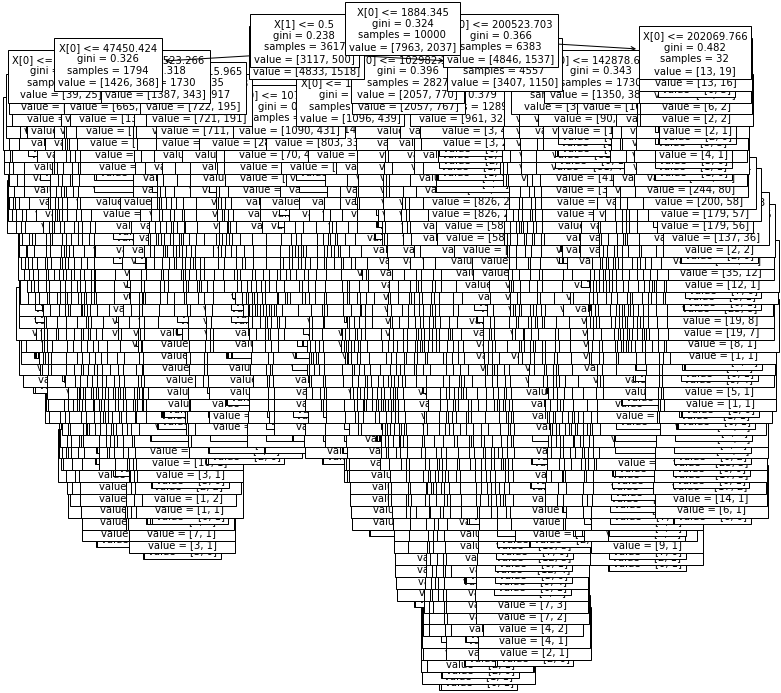

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
tree.plot_tree(clf, fontsize=10)
plt.show()

In [15]:
y = clf.predict([[152000,0]])
y

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])


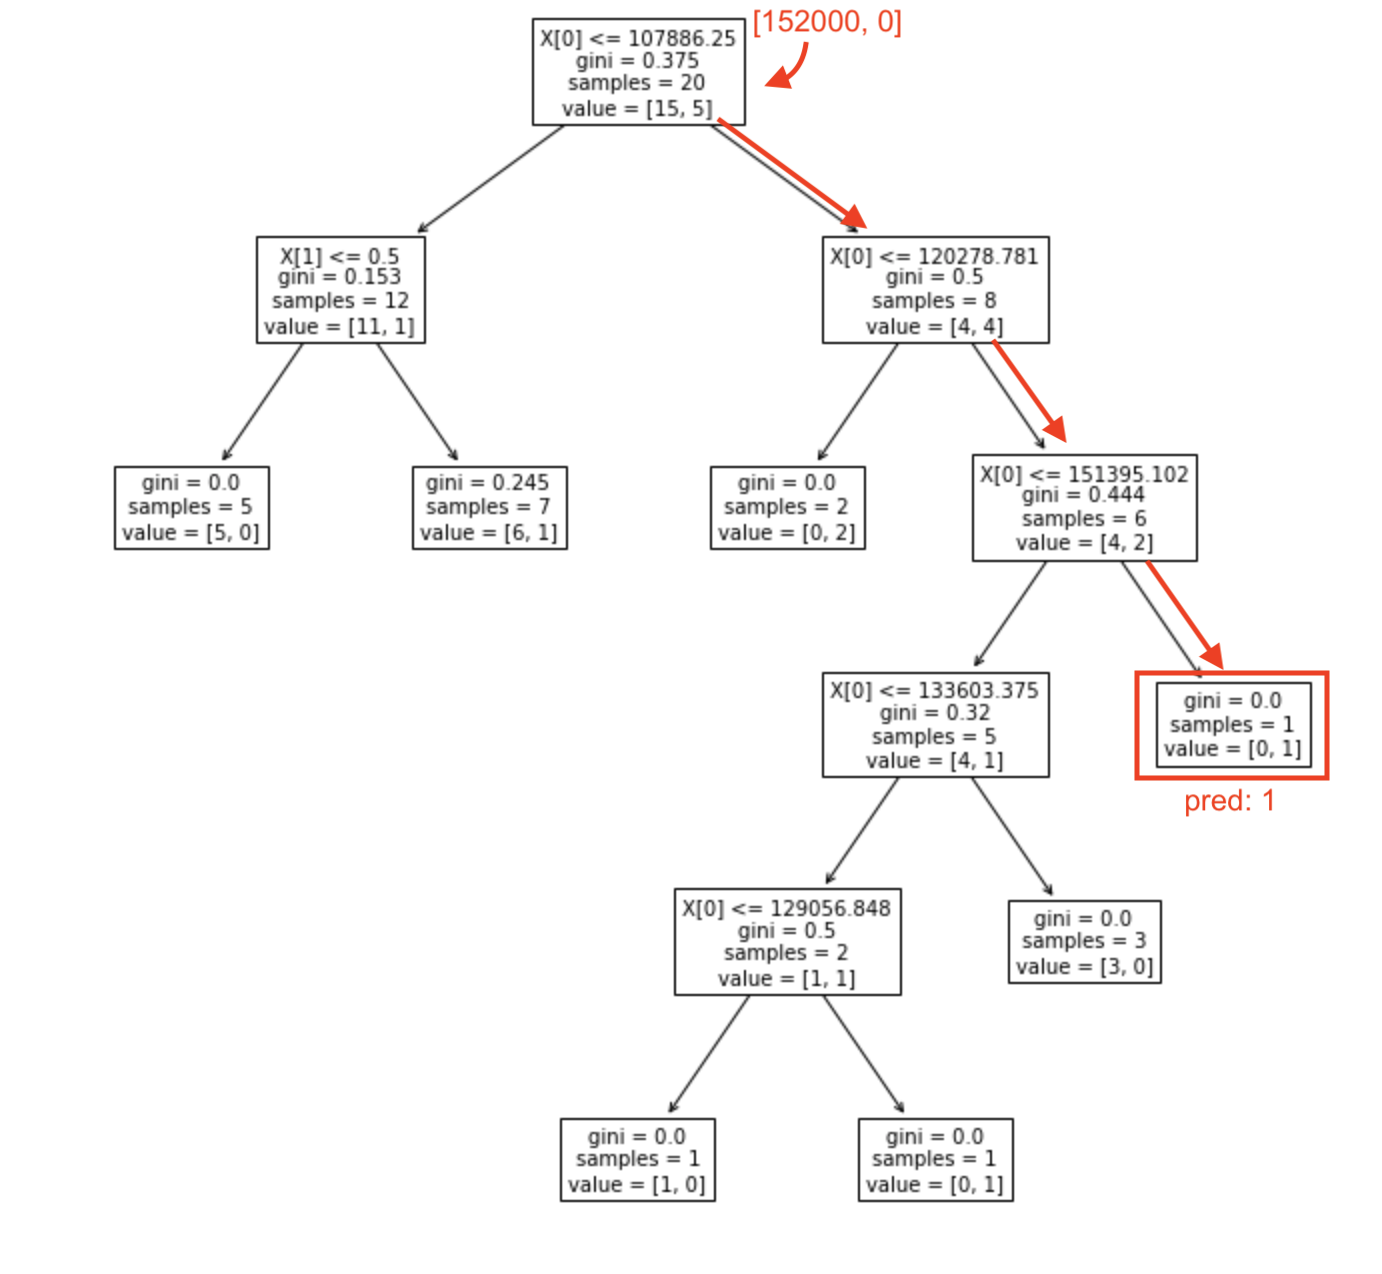